1) Importing the required libraries and load the training and testing data

In [468]:
#this is a supervised meachine learnig model.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
df=pd.read_csv('/content/train.csv')
df1=pd.read_csv('/content/train_label.csv',header=None,names=['total_booking'])
df['total_booking']=df1['total_booking']
df_test=pd.read_csv('/content/test.csv')
df1=pd.read_csv('/content/test_label.csv',header=None,names=['total_booking'])
df_test['total_booking']=df1['total_booking']

2) Analyze the dataset and write your observations 


In [469]:
#shape of train
df.shape

(8708, 10)

In [470]:
#shape of test
df_test.shape

(2178, 10)

In [471]:
#Checking Datatypes of train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [472]:
#Checking Datatypes of test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2178 non-null   object 
 1   season         2178 non-null   object 
 2   holiday        2178 non-null   int64  
 3   workingday     2178 non-null   int64  
 4   weather        2178 non-null   object 
 5   temp           2178 non-null   float64
 6   atemp          2178 non-null   float64
 7   humidity       2178 non-null   int64  
 8   windspeed      2178 non-null   float64
 9   total_booking  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


In [473]:
#checking missing values in train
df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64

In [474]:
#checking missing values in test
df_test.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64

3) Feature Engineering: 

In [475]:
# date,hour,weekday,month feature extracting for train
df['date']=pd.to_datetime(df['datetime']).dt.strftime("%Y%m%d").astype(int)
df['hour']=pd.to_datetime(df['datetime']).dt.hour
df['weekDay']=pd.to_datetime(df['datetime']).dt.weekday
df['month']=pd.to_datetime(df['datetime']).dt.month
df = df.drop(['datetime'], axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,20120502,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,20120905,4,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,20110113,9,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,20111118,16,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,20110913,13,1,9


In [476]:
# date,hour,weekday,month feature extracting for test
df_test['date']=pd.to_datetime(df_test['datetime']).dt.strftime("%Y%m%d").astype(int)
df_test['hour']=pd.to_datetime(df_test['datetime']).dt.hour
df_test['weekDay']=pd.to_datetime(df_test['datetime']).dt.weekday
df_test['month']=pd.to_datetime(df_test['datetime']).dt.month
df_test = df_test.drop(['datetime'], axis=1)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,20120510,11,3,5
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,20120609,7,5,6
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,20110306,20,6,3
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,20111013,11,3,10
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,20120602,12,5,6


4) Outlier Analysis:

train


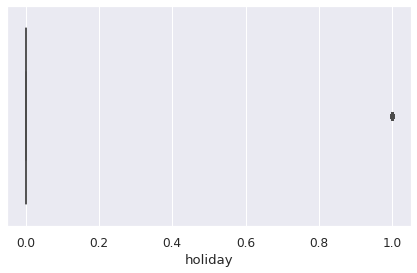

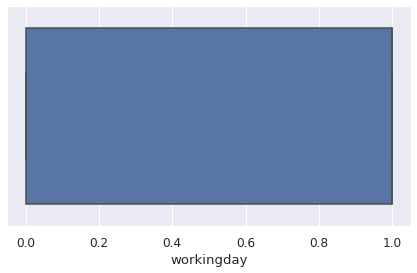

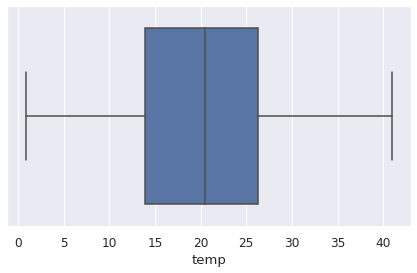

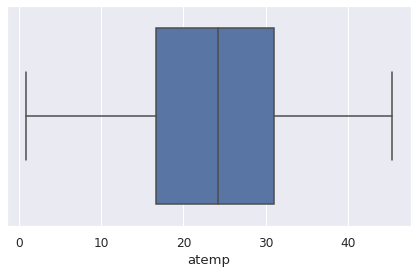

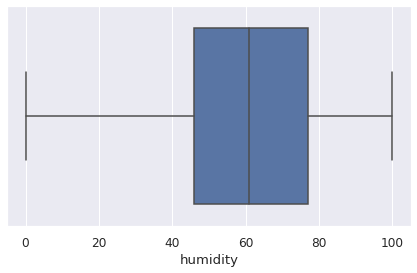

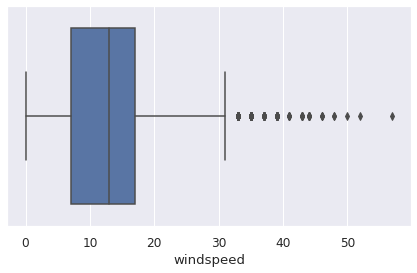

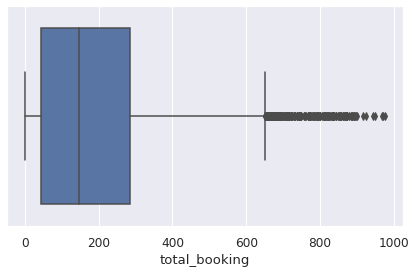

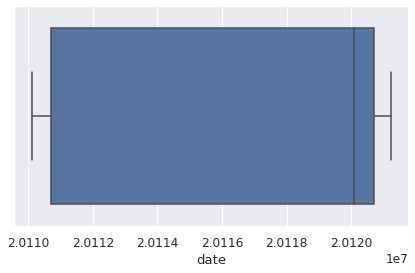

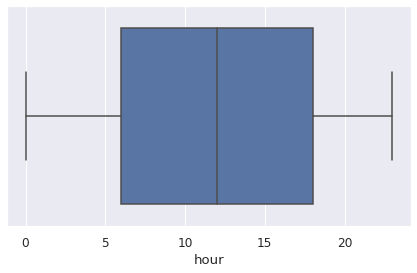

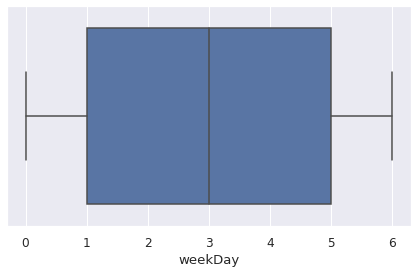

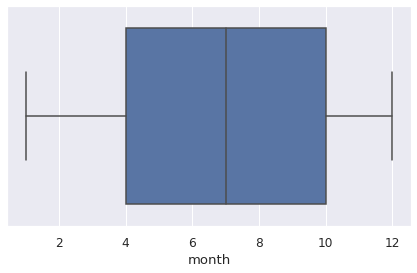

test


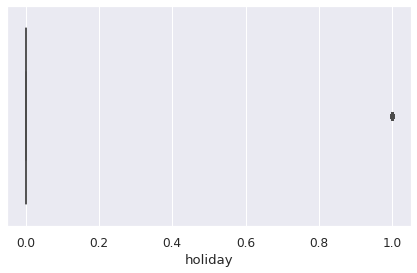

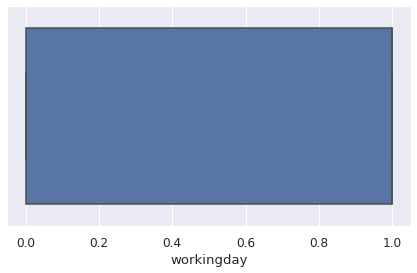

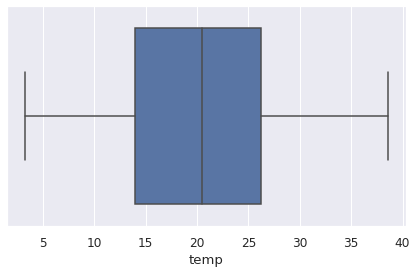

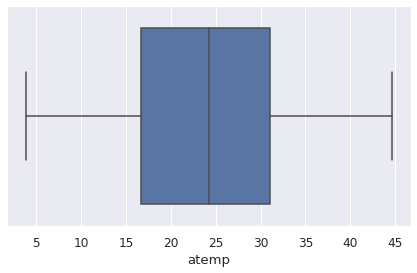

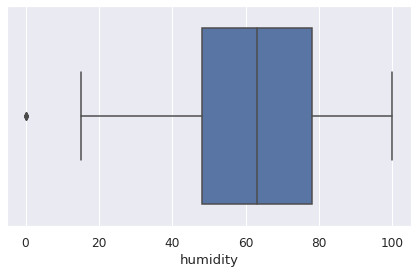

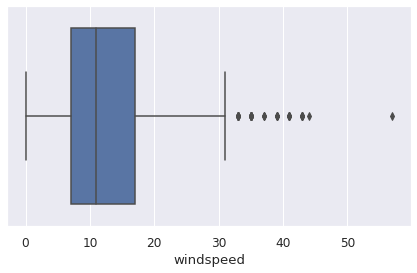

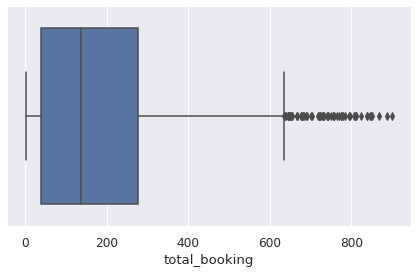

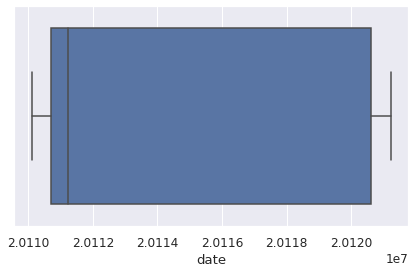

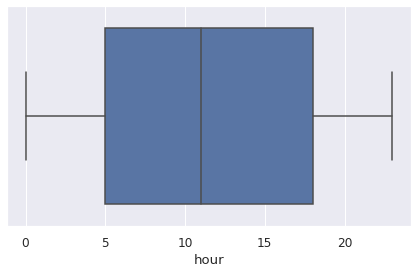

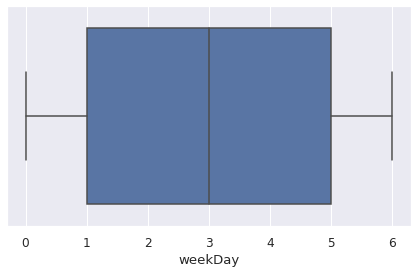

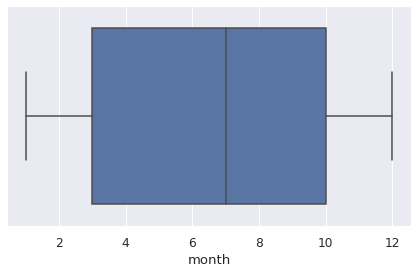

In [477]:
#To show box plots for test and train 
def show_plots(x,n):
  Column_Names=x.columns
  print(n)
  for j in Column_Names:
      try:
          #visualisation of outliers
          a = sns.boxplot(data=x,x=x[j])
          plt.tight_layout() 
          plt.show() 
      except:
          continue

  return
show_plots(df,'train')
show_plots(df_test,'test')

In [478]:
#outliners are present in test dataset for columns holiday, humidity, windspeed, totalbooking function to auto remove outliers
def remove_outliers(x):
  Column_Names=x.columns
  for j in Column_Names:
      try:
          xy=x[j]    
          mydata=pd.DataFrame()

          updated=[]
          Q1,Q3=np.percentile(xy,[25,75])
          IQR=Q3-Q1
          minimum=Q1-1.5*IQR
          maximum=Q3+1.5*IQR

          for i in xy:
              if(i>maximum):
                  i=maximum
                  updated.append(i)
              elif(i<minimum):
                  i=minimum
                  updated.append(i)
              else:
                  updated.append(i)

          x[j]=updated
          
      except:
          continue

  return x
df = remove_outliers(df)
df_test = remove_outliers(df_test)  

5) Correlation Analysis:

Text(0.5, 1.0, 'correlation between features')

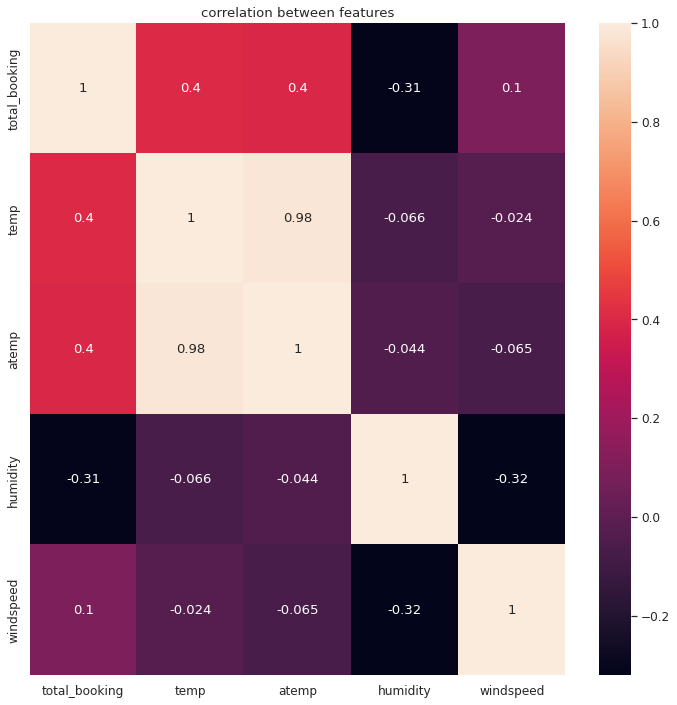

In [479]:
#correlation between features for train
corrMatrix = df[["total_booking", "temp", "atemp", "humidity", "windspeed"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix,annot=True)
plt.title('correlation between features')


1.atemp & temp having strong correlation between them --> so one feature is sufficient in building the model
2.temp/atemp has +ive correlation & humidity has -ive correlation with total bookings
3.windspeed has less correlation on total bookings, but some dependency is there.So, i am retaining it




Text(0.5, 1.0, 'correlation between features')

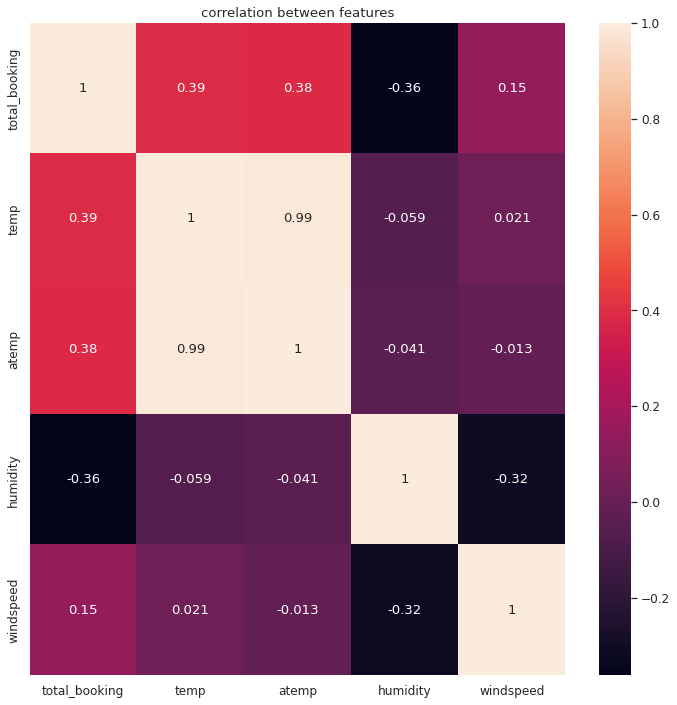

In [480]:
#correlation between features for test
corrMatrix = df_test[["total_booking", "temp", "atemp", "humidity", "windspeed"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix,annot=True)
plt.title('correlation between features')


1.atemp & temp having strong correlation between them --> so one feature is sufficient in building the model
2.temp/atemp has +ive correlation & humidity has -ive correlation with total bookings
3.windspeed has less correlation on total bookings, but some dependency is there.So, i am retaining it




6) Data Visualization: 

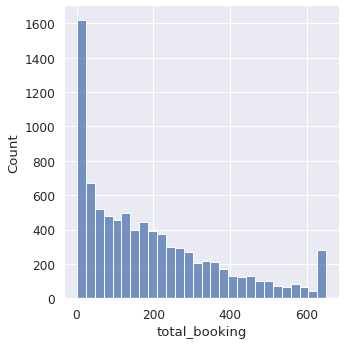

In [481]:
#plot for total booking in train 
sns.displot(df['total_booking'])

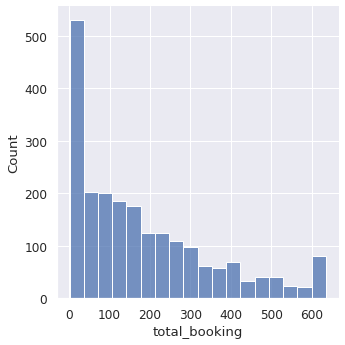

In [482]:
#plot for total booking in test 
sns.displot(df_test['total_booking'])

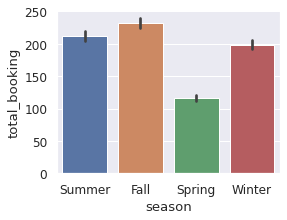

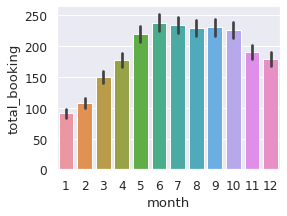

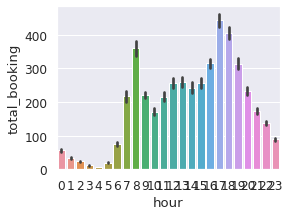

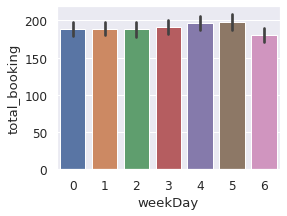

In [483]:
#Total_booking vs season,month,hour,weekDay for train data
plt.figure(figsize=(4,3))
sns.barplot(x='season',y='total_booking',data=df)
plt.figure(figsize=(4,3))
sns.barplot(x='month',y='total_booking',data=df)
plt.figure(figsize=(4,3))
sns.barplot(x='hour',y='total_booking',data=df)
plt.figure(figsize=(4,3))
sns.barplot(x='weekDay',y='total_booking',data=df)

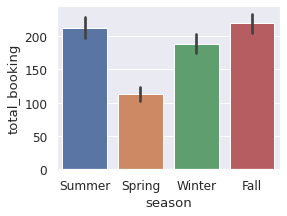

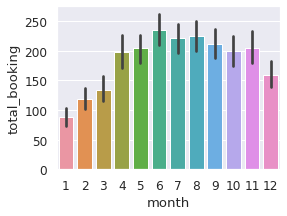

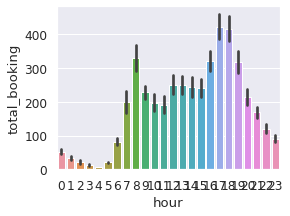

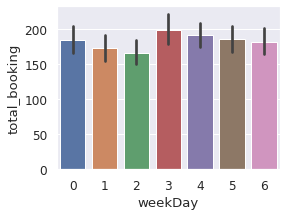

In [484]:
#Total_booking vs season,month,hour,weekDay for train data
plt.figure(figsize=(4,3))
sns.barplot(x='season',y='total_booking',data=df_test)
plt.figure(figsize=(4,3))
sns.barplot(x='month',y='total_booking',data=df_test)
plt.figure(figsize=(4,3))
sns.barplot(x='hour',y='total_booking',data=df_test)
plt.figure(figsize=(4,3))
sns.barplot(x='weekDay',y='total_booking',data=df_test)

<div dir="rtl" lang="he" xml:lang="he">

train


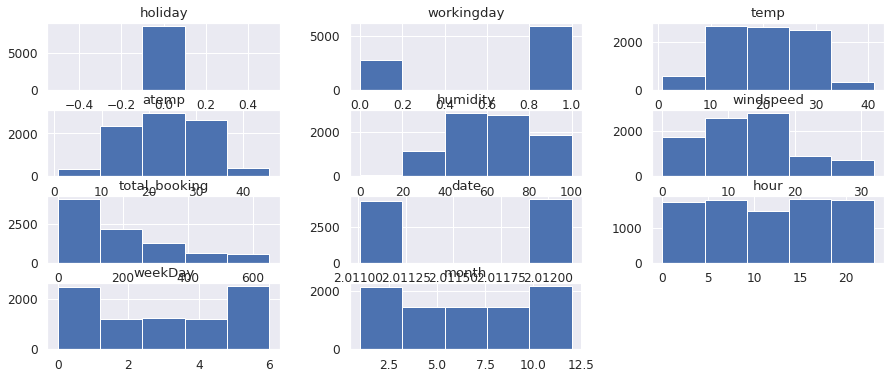

In [485]:
#To show histogram for continuous variables in train
def show_plots(x,n):
  Column_Names=x.columns
  print(n)
  for j in Column_Names:
      try:
          #visualisation of outliers
          df[x[j] >= 0].hist(bins=5, figsize=(15,6))
          plt.show()
          break
      except:
          continue

  return
show_plots(df,'train')

7) one hot vector 

In [486]:
#performing onehotencoding on train
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['season','weather']]).toarray())
ohe_df=df.join(enc_data)
ohe_df.drop(columns=['season'],axis=1,inplace=True)
ohe_df.drop(columns=['weather'],axis=1,inplace=True)
ohe_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,total_booking,date,hour,weekDay,month,0,1,2,3,4,5,6,7
0,0.0,1,22.14,25.760,77,16.9979,504.0,20120502,19,2,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1,28.70,33.335,79,19.0012,5.0,20120905,4,2,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1,5.74,6.060,50,22.0028,139.0,20110113,9,3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1,13.94,16.665,29,8.9981,209.0,20111118,16,4,11,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1,30.34,33.335,51,19.0012,184.0,20110913,13,1,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [487]:
#performing onehotencoding on test
enc=OneHotEncoder()
ohe_df_test=pd.get_dummies(df_test, columns = ['season','weather'])
ohe_df_test=df_test.join(enc_data)
ohe_df_test.drop(columns=['season'],axis=1,inplace=True)
ohe_df_test.drop(columns=['total_booking'],axis=1,inplace=True)
ohe_df_test.drop(columns=['weather'],axis=1,inplace=True)
ohe_df_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,0,1,2,3,4,5,6,7
0,0.0,1,21.32,25.000,48.0,31.9925,20120510,11,3,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0,23.78,27.275,64.0,7.0015,20120609,7,5,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0,11.48,12.120,100.0,27.9993,20110306,20,6,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1,25.42,28.790,83.0,0.0000,20111013,11,3,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0,25.42,31.060,43.0,23.9994,20120602,12,5,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


8) Spliting Dataset

In [488]:
#training and comparing models
X=ohe_df.drop(columns=['total_booking'])
y=ohe_df['total_booking']
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)


9) Fit various models

In [489]:
#Fiting various models
models=[]
r2score_values=[]
rmsescore_values=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))

for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    print(f'{name} - RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')
    r2score_values.append(round(r2_score(y_test,y_pred),3))
    rmsescore_values.append(round(mean_squared_error(y_test,y_pred,squared=False),3))

LinearRegression - RMSE value:133.691,R2 score:0.425
Randomforest - RMSE value:40.106,R2 score:0.948
DecisionTree - RMSE value:55.716,R2 score:0.9
SVR - RMSE value:181.76,R2 score:-0.062
AdaBoostRegressor - RMSE value:101.501,R2 score:0.669
KNeighborsRegressor - RMSE value:119.878,R2 score:0.538


10) Factor plot to visualize the RMSE values 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


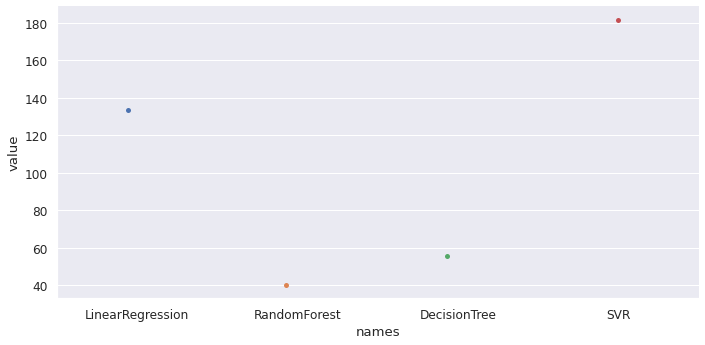

In [490]:
model_names=['LinearRegression','RandomForest','DecisionTree','SVR']
b['names'] = pd.DataFrame(model_names)   
b['value'] = pd.DataFrame(rmsescore_values)     
sns.factorplot(x ='names',y='value', kind = 'strip', data = b, height=5, aspect=2)
plt.show()

Random forest model performs well compared to the remaining models

11) Hyper-parameter tuning on the best model

In [491]:
#Grid search
model_params_RF = { 'n_estimators':range(20,100,20),
                   'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth':range(3,15)                
               } 
grid_scores_RF=GridSearchCV(estimator=RandomForestRegressor(),param_grid=model_params_RF,verbose=True,cv=2,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_RF.fit(x_train,y_train)  

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(20, 100, 20)},
             return_train_score=True, scoring='r2', verbose=True)

In [492]:
print('best parameters ',grid_scores_RF.best_params_)

best parameters  {'max_depth': 13, 'max_features': 'auto', 'n_estimators': 80}


12) prediction on the test set and the mean_squared_log_error 

In [493]:
#model testing and predicting the values on 'test dataset'
bagging_RF=BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=100)
bagging_RF.fit(x_train,y_train)
X_test = ohe_df_test
Y_prediction_test=bagging_RF.predict(X_test)
df_prediction=pd.DataFrame(np.round(Y_prediction_test),columns=['prediction'])
print(df_prediction,
' mean_squared_log_error-> ',mean_squared_log_error(df1['total_booking'], df_prediction))


      prediction
0          229.0
1           71.0
2           48.0
3          137.0
4          595.0
...          ...
2173         4.0
2174       139.0
2175       146.0
2176        23.0
2177       379.0

[2178 rows x 1 columns]  mean_squared_log_error->  0.14106105153051304
